<a target="_blank" href="https://colab.research.google.com/github/paulotguerra/QXD0178/blob/main/03.E0-Exercicio-Agrupamento-de-Dados.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

## QXD0178 - Mineração de Dados
# Agrupamento de dados

**Professor:** Paulo de Tarso Guerra Oliveira ([paulodetarso@ufc.br](mailto:paulodetarso@ufc.br))


# Lista de Exercícios: Agrupamento de dados

Nesta lista de exercícios, você explorará a aplicação de métodos de aprendizado de máquina para realizar tarefas de agrupamento de dados (*clustering*). Você usará a base de dados [Iris plants dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#iris-plants-dataset) e avaliará algoritmos de agrupamento para comparar sua efetividade. O objetivo é entender como diferentes métodos de aprendizado de máquina se comportam em relação à tarefa de agrupamento de dados.

Você deverá utilizar os algoritmos [K-Means](https://scikit-learn.org/stable/modules/clustering.html#k-means), [Gaussian Mixture](https://scikit-learn.org/stable/modules/mixture.html#mixture) e [DBSCAN](https://scikit-learn.org/stable/modules/clustering.html#dbscan) e comparar o resultado produzido por cada modelo para o seguinte conjunto de hiperparâmtros, quando aplicável aquele modelo.

* K-means: 
    * Centróides (`n_clusters`): 2, 3, e 6.    
* Gaussian Mixture
    * Componentes (`n_components`): 2, 3, e 6
    * Covariância (`covariance_type`): `'full'`, `'diag'` e `'spherical'`
* DBSCAN:
    * Distância (`eps`): 0.5, 1 e 1.5.
    * Mínimo de amostras (`min_samples`): 5, 10 e 25.


Como parte do objetivo praticar visualizações de dados, para cada experimento, você deve replicar a seguinte visualização usando apenas o [matplotlib](https://matplotlib.org/stable/users/index).

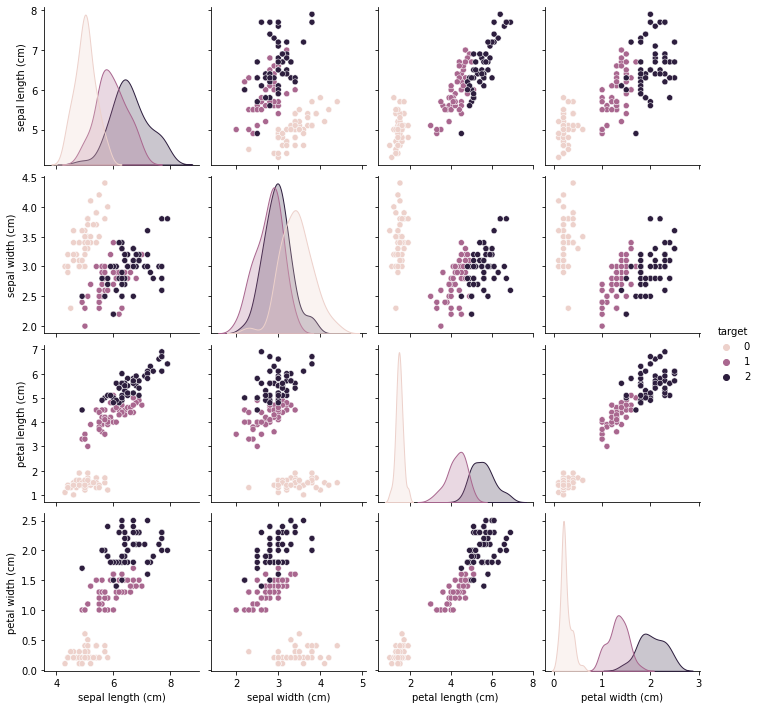

Você deve executar o experimento para cada par *features*, colorindo de acordo com o resultado fornecido pelo modelo de clusterização. Nos elementos da diagonal, você deve executar o cálculo de densidade dos elementos do conjunto usando `KDE` (`bandwidth=1.0, kernel='gaussian'`), também de acordo com a saída do modelo. Compare os experimentos entre si e com o que deveria ser a saída correta dos dados, segundo os rótulos originais do *dataset*. 

Documente todas as etapas em um arquivo Jupyter Notebook (`.ipynb`) que inclua as análises, o código e as justificativas. Lembre-se de que é fundamental justificar todas as decisões tomadas ao longo do processo e documentar as análises de forma clara e concisa. Este trabalho tem como objetivo proporcionar uma compreensão prática da seleção e avaliação de algoritmos de agrupamento em cenários de aprendizado não-supervisionado.

Envie seu Jupyter Notebook até a data de entrega especificada nesta tarefa.

## Solução


### Carga do conjunto de dados

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
target = iris.target
class_names = iris.target_names
#df['label'] = [iris.target_names[i] for i in iris.target]

df.head()

### Kernel Density Estimation (KDE)

Criando a função que calcula a densidade

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt

X = StandardScaler().fit_transform(df)

def density_estimation(ax, X, feature, labels):
    unique_labels = np.unique(labels)
    colors = plt.cm.viridis(np.linspace(0, 1, len(unique_labels)))
    for i, label in enumerate(unique_labels):
        kde = KernelDensity(bandwidth=1.0, kernel='gaussian')
        kde.fit(X[labels == label][:, feature][:, None])
        x_d = np.linspace(np.min(X[:, feature]), np.max(X[:, feature]))
        logprob = kde.score_samples(x_d[:, None])
        ax.plot(x_d, np.exp(logprob), label=f'{label}', color=colors[i])
    ax.legend()

### K-means

Aplicando k-means com n_clusters 2, 3 e 6. Estou verificando se os índices da matriz são iguais para realizar o cálculo da densidade nos elementos da diagonal.

In [ ]:
from sklearn.cluster import KMeans

for n_clusters in [2, 3, 6]:
    fig, axis = plt.subplots(4, 4, figsize=(15, 15))
    fig.suptitle(f'n_clusters={n_clusters}', fontsize=16, fontweight='bold')
    
    for feature_1 in range(df.shape[1]):
        for feature_2 in range(df.shape[1]):
            ax = axis[feature_1, feature_2]
            
            kmeans = KMeans(n_clusters=n_clusters, n_init=10)
            labels = kmeans.fit_predict(X)
            
            if feature_1 == feature_2:
                density_estimation(ax, X, feature_1, labels)
            else:
                ax.scatter(X[:, feature_1], X[:, feature_2], c=labels, cmap='viridis')
            ax.set_xlabel(df.columns[feature_1])
            ax.set_ylabel(df.columns[feature_2])
    plt.tight_layout()
    plt.show()

### Gaussian

Aplicando Gaussian Mixture com n_components 2, 3 e 6 e covariance_type full, diag e spherical. Estou verificando se os índices da matriz são iguais para realizar o cálculo da densidade nos elementos da diagonal.

In [ ]:
from sklearn.mixture import GaussianMixture

for n_components in [2, 3, 6]:
    for covariance_type in ['full', 'diag', 'spherical']:
        fig, axis = plt.subplots(4, 4, figsize=(15, 15))
        fig.suptitle(f'n_components={n_components}, covariance_type={covariance_type}', fontsize=16, fontweight='bold')
        
        for feature_1 in range(df.shape[1]):
            for feature_2 in range(df.shape[1]):
                ax = axis[feature_1, feature_2]
                
                gm = GaussianMixture(n_components=n_components, covariance_type=covariance_type, n_init=10)
                labels = gm.fit_predict(X)
                
                if feature_1 == feature_2:
                    density_estimation(ax, X, feature_1, labels)
                else:
                    scatter = ax.scatter(X[:, feature_1], X[:, feature_2], c=labels, cmap='viridis')
                ax.set_xlabel(df.columns[feature_1])
                ax.set_ylabel(df.columns[feature_2])
        plt.tight_layout()
        plt.show()

### DBSCAN

Aplicando DBSCAN com eps 0.5, 1 e 1.5 e min_samples 5, 10 e 25. Estou verificando se os índices da matriz são iguais para realizar o cálculo da densidade nos elementos da diagonal.

In [ ]:
from sklearn.cluster import DBSCAN

for eps in [0.5, 1, 1.5]:
    for min_samples in [5, 10, 25]:
        fig, axis = plt.subplots(4, 4, figsize=(15, 15))
        fig.suptitle(f'eps={eps}, min_samples={min_samples}', fontsize=16, fontweight='bold')
        
        for feature_1 in range(df.shape[1]):
            for feature_2 in range(df.shape[1]):
                ax = axis[feature_1, feature_2]
                
                dbscan = DBSCAN(eps=eps, min_samples=min_samples)
                labels = dbscan.fit_predict(X)
                
                if feature_1 == feature_2:
                    density_estimation(ax, X, feature_1, labels)
                else:
                    scatter = ax.scatter(X[:, feature_1], X[:, feature_2], c=labels, cmap='viridis')
                ax.set_xlabel(df.columns[feature_1])
                ax.set_ylabel(df.columns[feature_2])
        plt.tight_layout()
        plt.show()

### Análise dos resultados

- A eficácia do K-Means foi mais clara com um número menor de clusters. 6 clusters dificultaram a interpretação.
- Com 6 clusters parece haver uma sobreposição, parecendo que a separação não fica tão clara.

- Com o Gaussian parece haver uma divisão clara com n_components 2 e com 3 existem algumas sobreposições.
- Com 6 existem muitas sobreposições.

- No DBSCAN apenas com eps=1.5 foi possível ver uma separação melhor.